<a href="https://colab.research.google.com/github/vcn2fj/ds2002_hw2/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Elizabeth Wu vcn2fj
#1
import sqlite3
# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Create a cursor object (controller that connects to db)
cursor = connection.cursor()

In [3]:
#2
# Create the students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

# Create the grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER REFERENCES students(student_id),
    subject TEXT,
    grade INTEGER
)
''')

In [4]:
cursor.execute("DELETE FROM students")
cursor.execute("DELETE FROM grades")
connection.commit()

In [5]:
#3
# Sample data to insert into the students table
students_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data)

# Commit the transaction
connection.commit()

# Sample data to insert into the grades table
grades_data = [
    (1, 1, 'Math', 95),
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 82),
    (5, 2, 'English', 82),
    (6, 2, 'History', 85),
    (7, 3, 'Math', 95),
    (8, 3, 'English', 88),
    (9, 3, 'History', 90),
    (10, 4, 'Math', 82),
    (11, 4, 'English', 79),
    (12, 4, 'History', 80),
     (13, 5, 'Math', 95),
    (14, 5, 'English', 99),
    (15, 5, 'History', 94),
]

# Insert data into the table
cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

In [6]:
#4
# Perform a JOIN query between students and grades
cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

# Fetch and display the results
joined_data = cursor.fetchall()

print("Joined student names and their grades:")
for row in joined_data:
    print(row)

Joined student names and their grades:
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 82)
('Bob', 'Smith', 85)
('Carol', 'White', 95)
('Carol', 'White', 88)
('Carol', 'White', 90)
('David', 'Brown', 82)
('David', 'Brown', 79)
('David', 'Brown', 80)
('Eve', 'Davis', 95)
('Eve', 'Davis', 99)
('Eve', 'Davis', 94)


In [7]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name
''')

average_grades = cursor.fetchall()

print("student name and their avg grades:")
for row in average_grades:
    print(row)

student name and their avg grades:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 83.0)
('Carol', 'White', 91.0)
('David', 'Brown', 80.33333333333333)
('Eve', 'Davis', 96.0)


In [8]:
# finding student with highest avg grade
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name
ORDER BY AVG(grades.grade) DESC
LIMIT 1;
''')

highest_avg = cursor.fetchall()

print("student with highest avg grade:")
for row in highest_avg:
    print(row)

student with highest avg grade:
('Eve', 'Davis', 96.0)


In [9]:
# finding the avg grade for the math subject
cursor.execute('''
SELECT AVG(grade)
FROM grades
WHERE subject = 'Math'
LIMIT 1;
''')

avg_math = cursor.fetchall()

print("avg math grade:")
for row in avg_math:
    print(row)

avg math grade:
(89.8,)


In [10]:
# listing all students who scored above 90 in any subject
cursor.execute('''
SELECT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
GROUP BY students.student_id, students.first_name
''')

above = cursor.fetchall()

print("students who scored above 90 in any subject:")
for row in above:
    print(row)

students who scored above 90 in any subject:
('Alice', 'Johnson')
('Carol', 'White')
('Eve', 'Davis')


In [11]:
#5
import pandas as pd

# Query the sales data into a DataFrame
df = pd.read_sql_query('''SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
JOIN grades ON students.student_id = grades.student_id''', connection)

# Display the DataFrame
df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,82


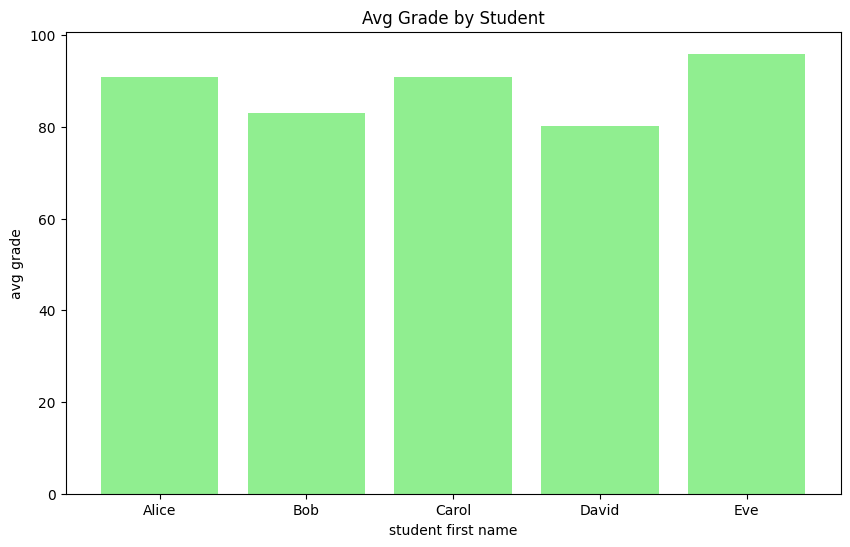

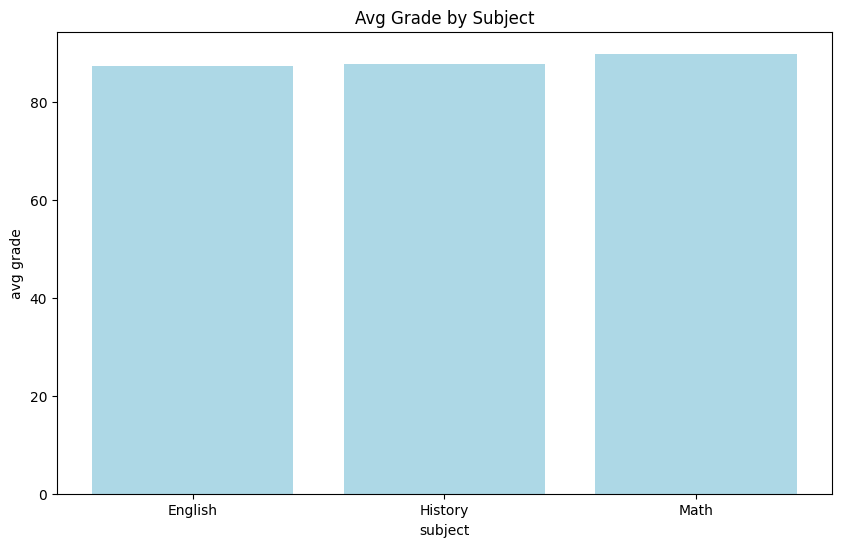

In [12]:
import matplotlib.pyplot as plt
df2 = pd.read_sql_query('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name
''', connection)

# # Plot grade data
plt.figure(figsize=(10,6))
plt.bar(df2['first_name'], df2['AVG(grades.grade)'], color='lightgreen')
plt.xlabel('student first name')
plt.ylabel('avg grade')
plt.title('Avg Grade by Student')
plt.show()

df3 = pd.read_sql_query('''
SELECT subject, AVG(grade)
FROM grades
GROUP BY subject
''', connection)

# # Plot subject data
plt.figure(figsize=(10,6))
plt.bar(df3['subject'], df3['AVG(grade)'], color='lightblue')
plt.xlabel('subject')
plt.ylabel('avg grade')
plt.title('Avg Grade by Subject')
plt.show()